In [93]:
import pandas as pd
import numpy as np
import math

np.random.seed(123)

## Load data

In [2]:
df_gym = pd.read_csv('data/gym_members_exercise_tracking.csv')
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
df_gym.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [4]:
df_gym.shape

(973, 15)

In [5]:
df_hr = pd.read_csv('data/heart_rate.csv')
df_hr.head()

,T1,T2,T3,T4
0,84.2697,91.4634,60.4839,59.2885
1,84.2697,91.4634,60.4839,59.2885
2,84.0619,91.1834,60.4606,59.2885
3,85.6542,91.8788,60.3391,58.8973
4,87.2093,91.1772,60.0762,58.4359


In [7]:
df_hr.isnull().sum()

T1      0
T2      0
T3    850
T4    909
dtype: int64

In [8]:
df_hr.shape

(1800, 4)

## Synthetic data

### Obtain standard deviation

In [9]:
# Convert de dataframe columns into lists
subject_1 = df_hr.iloc[:, 0].tolist()
subject_2 = df_hr.iloc[:, 1].tolist()
subject_3 = df_hr.iloc[:, 2].tolist()
subject_4 = df_hr.iloc[:, 3].tolist()



#Remove nans from the lists
subject_1 = [x for x in subject_1 if str(x) != 'nan']
subject_2 = [x for x in subject_2 if str(x) != 'nan']
subject_3 = [x for x in subject_3 if str(x) != 'nan']
subject_4 = [x for x in subject_4 if str(x) != 'nan']

In [10]:
print('Measurements for subject 1:', len(subject_1))
print('Measurements for subject 2:', len(subject_2))
print('Measurements for subject 3:', len(subject_3))
print('Measurements for subject 4:', len(subject_4))

Measurements for subject 1: 1800
Measurements for subject 2: 1800
Measurements for subject 3: 950
Measurements for subject 4: 891


In [ ]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [round(np.mean(subject_1), 2), round(np.max(subject_1), 2), round(np.min(subject_1), 2), round(np.std(subject_1), 2), ]
subject_2_data = [round(np.mean(subject_2), 2), round(np.max(subject_2), 2), round(np.min(subject_2), 2), round(np.std(subject_2), 2)]
subject_3_data = [round(np.mean(subject_3), 2), round(np.max(subject_3), 2), round(np.min(subject_3), 2), round(np.std(subject_3), 2)]
subject_4_data = [round(np.mean(subject_4), 2), round(np.max(subject_4), 2), round(np.min(subject_4), 2), round(np.std(subject_4), 2)]

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.head()


,Mean,Max,Min,Std
Subject 1,92.60,106.76,73.44,5.49
Subject 2,96.64,104.90,80.21,5.69
Subject 3,58.67,75.47,52.08,3.41
Subject 4,58.52,77.42,52.92,3.48


In [125]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [np.mean(subject_1), np.max(subject_1), np.min(subject_1), np.std(subject_1)]
subject_2_data = [np.mean(subject_2), np.max(subject_2), np.min(subject_2), np.std(subject_2)]
subject_3_data = [np.mean(subject_3), np.max(subject_3), np.min(subject_3), np.std(subject_3)]
subject_4_data = [np.mean(subject_4), np.max(subject_4), np.min(subject_4), np.std(subject_4)]

subject_1_data.append(subject_1_data[3]/(subject_1_data[1] - subject_1_data[0])) #Standard deviation represented as a its ratio of the range between the mean and maximum value
subject_2_data.append(subject_2_data[3]/(subject_2_data[1] - subject_2_data[0]))
subject_3_data.append(subject_3_data[3]/(subject_3_data[1] - subject_3_data[0]))
subject_4_data.append(subject_4_data[3]/(subject_4_data[1] - subject_4_data[0]))

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std', 'Std Ratio'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.round(2)

,Mean,Max,Min,Std,Std Ratio
Subject 1,92.60,106.76,73.44,5.49,0.39
Subject 2,96.64,104.90,80.21,5.69,0.69
Subject 3,58.67,75.47,52.08,3.41,0.20
Subject 4,58.52,77.42,52.92,3.48,0.18


In [126]:
mean_std_ratio_avg_max = df_subjects_data['Std Ratio'].mean()
print(mean_std_ratio_avg_max)

0.36578887474025085


In [44]:
#Mean, maximun, minimum and standard deviation of the heart rate for each subject
subject_1_data = [np.mean(subject_1), np.max(subject_1), np.min(subject_1), np.std(subject_1)]
subject_2_data = [np.mean(subject_2), np.max(subject_2), np.min(subject_2), np.std(subject_2)]
subject_3_data = [np.mean(subject_3), np.max(subject_3), np.min(subject_3), np.std(subject_3)]
subject_4_data = [np.mean(subject_4), np.max(subject_4), np.min(subject_4), np.std(subject_4)]

subject_1_data.append(subject_1_data[3]/(subject_1_data[1] - subject_1_data[2])) #Standard deviation represented as a its ratio of the range between the minimum and maximum value
subject_2_data.append(subject_2_data[3]/(subject_2_data[1] - subject_2_data[2]))
subject_3_data.append(subject_3_data[3]/(subject_3_data[1] - subject_3_data[2]))
subject_4_data.append(subject_4_data[3]/(subject_4_data[1] - subject_4_data[2]))

# Create a dataframe with the data
df_subjects_data = pd.DataFrame([subject_1_data, subject_2_data, subject_3_data, subject_4_data], columns=['Mean', 'Max', 'Min', 'Std', 'Std Ratio'])
df_subjects_data.index = ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4']
df_subjects_data.round(2)

,Mean,Max,Min,Std,Std Ratio
Subject 1,92.60,106.76,73.44,5.49,0.16
Subject 2,96.64,104.90,80.21,5.69,0.23
Subject 3,58.67,75.47,52.08,3.41,0.15
Subject 4,58.52,77.42,52.92,3.48,0.14


In [121]:
mean_std_ratio_min_max = df_subjects_data['Std Ratio'].mean()
print(mean_std_ratio_min_max)

0.17072102970888003


The mean ratio of the standar deviation with respect to the interval between average and maximum heart rate values is 36.58% and between minimum and maximum is 17.07%.

### Generate synthetic data

In [ ]:
from scipy.stats import truncnorm

def genarate_heart_rates_truncnorm(min, max, avg, std, N):
    a = (min - avg) / std
    b = (max - avg) / std

    genarated_heart_rates = truncnorm.rvs(a, b, loc=avg, scale=std, size=N)

    return genarated_heart_rates

In [94]:
from scipy.stats import beta

def beta_params(min, max, avg, std):
    # Calculate α and β params of Beta distribution
    scale = max - min
    mu = (max - min) / scale  # Media en [0,1]
    sigma2 = (std / scale) ** 2  # Varianza en [0,1]
    
    # Equations for α and β from mean and variance
    alpha = mu * ((mu * (1 - mu)) / sigma2 - 1)
    beta_param = (1 - mu) * ((mu * (1 - mu)) / sigma2 - 1)
    
    return alpha, beta_param

def genarate_heart_rates_beta_old(min, max, avg, std, N):
    # Generate random numbers with Beta distribution scaled to [min, max]
    alpha, beta_param = beta_params(min, max, avg, std)
    
    if alpha <= 0 or beta_param <= 0:
        raise ValueError("The parameters α and β must be positive. Check the mean and standard deviation.")
    
    # Generar valores Beta en [0,1] y escalar al rango [minimo, maximo]
    numbers = beta.rvs(alpha, beta_param, size=N)
    numbers = min + numbers * (max - min)
    
    return numbers

In [132]:
import scipy.stats
import matplotlib.pyplot as plt

def my_distribution(min_val, max_val, mean, std):
    scale = max_val - min_val
    location = min_val
    # Mean and standard deviation of the unscaled beta distribution
    unscaled_mean = (mean - min_val) / scale
    unscaled_var = (std / scale) ** 2
    # Computation of alpha and beta can be derived from mean and variance formulas
    t = unscaled_mean / (1 - unscaled_mean)
    beta = ((t / unscaled_var) - (t * t) - (2 * t) - 1) / ((t * t * t) + (3 * t * t) + (3 * t) + 1)
    alpha = beta * t
    # Not all parameters may produce a valid distribution
    if alpha <= 0 or beta <= 0:
        raise ValueError('Cannot create distribution for the given parameters.')
    # Make scaled beta distribution with computed parameters
    return scipy.stats.beta(alpha, beta, scale=scale, loc=location)

def genarate_heart_rates_beta(min, max, avg, std, N, plot=False):
    my_dist = my_distribution(min, max, avg, std)
    
    generated_numbers = my_dist.rvs(size=N)
    if plot:  
        x = np.linspace(min, max, 100)
        plt.plot(x, my_dist.pdf(x))
    return generated_numbers

In [133]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Min: 60, Max: 180, Avg: 157, Std: 8.41314411902577, N: 101
Using truncated normal distribution
Real average: 157.98
Real std: 9.80
Real min: 130.96
Real max: 177.78


Using beta distribution
Real average: 158.18
Real std: 8.25
Real min: 133.68
Real max: 175.08


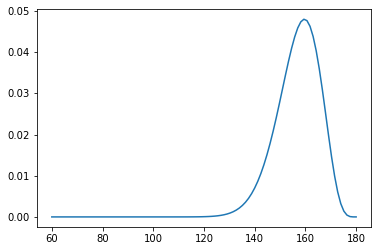

In [ ]:
min, max, avg, N = df_gym.iloc[0]['Resting_BPM'], df_gym.iloc[0]['Max_BPM'], df_gym.iloc[0]['Avg_BPM'], math.trunc(df_gym.iloc[0]['Session_Duration (hours)'] * 60)
std = mean_std_ratio_avg_max * (max - avg)
print(f"Min: {min}, Max: {max}, Avg: {avg}, Std: {std}, N: {N}")


genarated_heart_rates_truncnorm = genarate_heart_rates_truncnorm(min, max, avg, std, N)

print("Using truncated normal distribution")
print(f"Real average: {np.mean(genarated_heart_rates_truncnorm):.2f}")
print(f"Real std: {np.std(genarated_heart_rates_truncnorm, ddof=1):.2f}")
print(f"Real min: {np.min(genarated_heart_rates_truncnorm):.2f}")
print(f"Real max: {np.max(genarated_heart_rates_truncnorm):.2f}")

genarated_heart_rates_beta = genarate_heart_rates_beta(min, max, avg, std, N, True)

print("\n\nUsing beta distribution")
print(f"Real average: {np.mean(genarated_heart_rates_beta):.2f}")
print(f"Real std: {np.std(genarated_heart_rates_beta, ddof=1):.2f}")
print(f"Real min: {np.min(genarated_heart_rates_beta):.2f}")
print(f"Real max: {np.max(genarated_heart_rates_beta):.2f}")


Min: 60, Max: 180, Avg: 157, Std: 8.41314411902577, N: 101
Real average: 155.73
Real std: 8.44
Real min: 136.18
Real max: 172.39


Min: 66, Max: 179, Avg: 151, Std: 10.242088492727024, N: 78
Real average: 150.87
Real std: 10.35
Real min: 126.37
Real max: 171.52




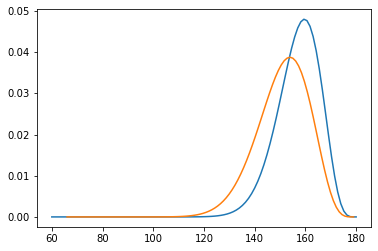

In [157]:
for index, row in df_gym.head(2).iterrows():
    min, max, avg, N = row['Resting_BPM'], row['Max_BPM'], row['Avg_BPM'], math.trunc(row['Session_Duration (hours)'] * 60)
    std = mean_std_ratio_avg_max * (max - avg)
    
    try:
        genarated_heart_rates_session = genarate_heart_rates_beta(min, max, avg, std, N, True)

        print(f"Min: {min}, Max: {max}, Avg: {avg}, Std: {std}, N: {N}")
        
        print(f"Real average: {np.mean(genarated_heart_rates_session):.2f}")
        print(f"Real std: {np.std(genarated_heart_rates_session, ddof=1):.2f}")
        print(f"Real min: {np.min(genarated_heart_rates_session):.2f}")
        print(f"Real max: {np.max(genarated_heart_rates_session):.2f}")

        print('\n')
    except Exception as e:
        print(f"Error for index {index}: {e}")
        continue


## First Model

In [153]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


### Fuzzy Logic

In [325]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [326]:
genarated_heart_rates_session

array([127.40046444, 158.76245762, 138.00821689, 139.85262431,
        88.7990481 , 116.32760429, 121.64908788, 136.43068908,
       116.17766696, 107.09376908, 117.57153983, 131.87507647,
       114.06897018,  95.53394856, 112.7967417 , 124.9237873 ,
       115.46511116, 122.18134709, 127.48654651, 105.15276931,
       133.5795006 , 149.16446605, 147.11209442, 117.01564371,
       119.29309856, 139.32538772, 112.75210847, 122.70191963,
       102.63289726, 111.16860062, 117.56311071, 126.85640368,
       131.18644508, 127.53181422,  98.00174309, 119.87587864,
       136.32714336, 126.8317968 , 123.26139913, 102.86411998,
       110.17804843, 132.46198317, 118.10210555, 100.30851158,
       127.93342672, 117.42824628, 113.1721332 , 118.51770431,
        93.5382225 , 104.88376448, 129.73323963, 126.22614804,
       131.75779392,  94.15728202, 106.46473283, 147.39593548,
       120.44395242, 102.41200923,  97.54151138, 120.91825119,
       148.70058545, 120.02219225, 103.67554179,  86.12

In [333]:
bpm_antecedent = ctrl.Antecedent(np.arange(30, 201, 1), 'BPM')
bpm_variation_antecedent = ctrl.Antecedent(np.arange(-30, 31, 1), 'BPM Variation')
intensity_consequent = ctrl.Consequent(np.arange(0, 101, 1), 'Intensity')

In [334]:
bpm_antecedent.automf(5, names=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
bpm_variation_antecedent.automf(3, names=['Negative', 'Zero', 'Positive'])
intensity_consequent.automf(3, names=['Low', 'Medium', 'High'])

c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


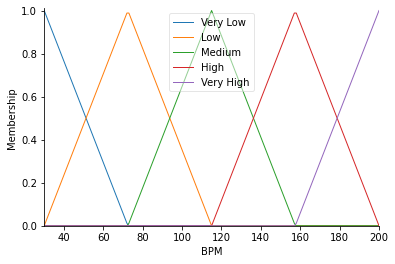

In [335]:
bpm_antecedent.view()

c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


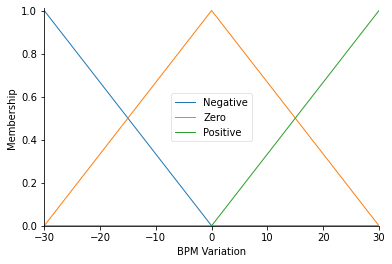

In [336]:
bpm_variation_antecedent.view()

c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


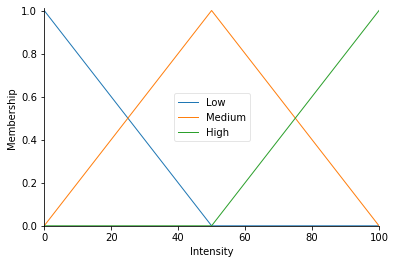

In [337]:
intensity_consequent.view()

In [338]:
# rule1 = ctrl.Rule(bpm_antecedent['Very Low'] , intensity_consequent['High'])
# rule2 = ctrl.Rule(bpm_antecedent['Low'], bpm_variation_antecedent['Negative'], intensity_consequent['High'])
# rule3 = ctrl.Rule(bpm_antecedent['Low'], bpm_variation_antecedent['Zero'], intensity_consequent['High'])
# rule4 = ctrl.Rule(bpm_antecedent['Low'], bpm_variation_antecedent['Positive'], intensity_consequent['Medium'])
# rule5 = ctrl.Rule(bpm_antecedent['Medium'], bpm_variation_antecedent['Negative'], intensity_consequent['High'])
# rule6 = ctrl.Rule(bpm_antecedent['Medium'], bpm_variation_antecedent['Zero'], intensity_consequent['Medium'])
# rule7 = ctrl.Rule(bpm_antecedent['Medium'], bpm_variation_antecedent['Positive'], intensity_consequent['Low'])
# rule8 = ctrl.Rule(bpm_antecedent['High'], bpm_variation_antecedent['Negative'], intensity_consequent['Medium'])
# rule9 = ctrl.Rule(bpm_antecedent['High'], bpm_variation_antecedent['Zero'], intensity_consequent['Low'])
# rule10 = ctrl.Rule(bpm_antecedent['High'], bpm_variation_antecedent['Positive'], intensity_consequent['Low'])
# rule11 = ctrl.Rule(bpm_antecedent['Very High'], intensity_consequent['Low'])

rule1 = ctrl.Rule(antecedent= (bpm_antecedent['Very Low'] |
                        (bpm_antecedent['Low'] & bpm_variation_antecedent['Negative']) |
                        (bpm_antecedent['Low'] & bpm_variation_antecedent['Zero']) |
                        (bpm_antecedent['Medium'] & bpm_variation_antecedent['Negative'])),
                        consequent=intensity_consequent['High'])
rule2 = ctrl.Rule(antecedent=((bpm_antecedent['Low'] & bpm_variation_antecedent['Positive']) |
                        (bpm_antecedent['Medium'] & bpm_variation_antecedent['Zero']) |
                        (bpm_antecedent['High'] & bpm_variation_antecedent['Negative'])),
                        consequent=intensity_consequent['Medium'])
rule3 = ctrl.Rule(antecedent=((bpm_antecedent['Medium'] & bpm_variation_antecedent['Positive']) |
                        (bpm_antecedent['High'] & bpm_variation_antecedent['Zero']) |
                        (bpm_antecedent['High'] & bpm_variation_antecedent['Positive'])),
                        consequent=intensity_consequent['Low'])

In [339]:
intensity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
intensity_sim = ctrl.ControlSystemSimulation(intensity_ctrl)

In [340]:
def calculate_intensity_fuzzy(bpm, bpm_variation, plot_consequent=False, plot_antecedent=False):
    intensity_sim.input['BPM'] = bpm
    intensity_sim.input['BPM Variation'] = bpm_variation
    intensity_sim.compute()
    if plot_consequent:
        intensity_consequent.view(sim=intensity_sim)
    if plot_antecedent:
        bpm_antecedent.view(sim=intensity_sim)
        bpm_variation_antecedent.view(sim=intensity_sim)
    return intensity_sim.output['Intensity']

#### Basic example

c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


47.384170156698524

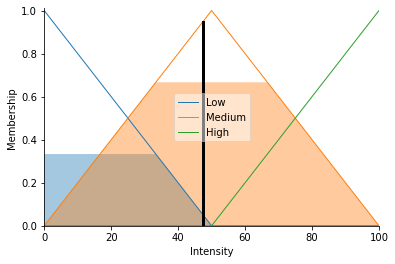

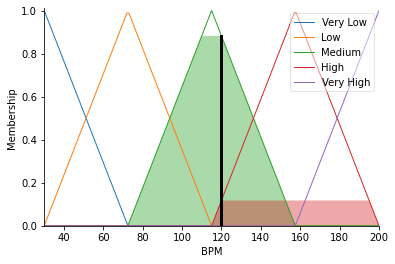

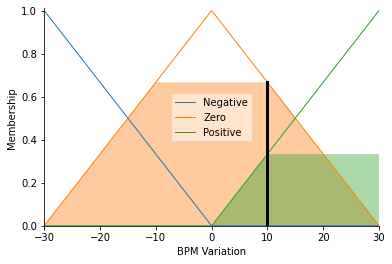

In [344]:
bpm = 120
bpm_variation = 10
calculate_intensity_fuzzy(bpm, bpm_variation, plot_consequent = True, plot_antecedent = True)

c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


75.45998530595496

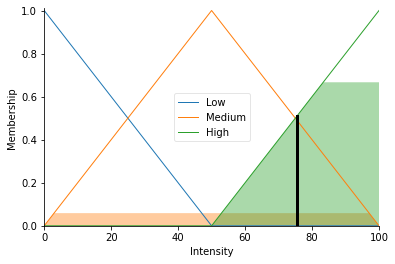

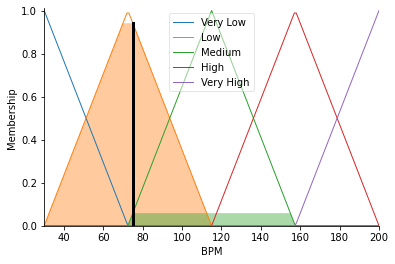

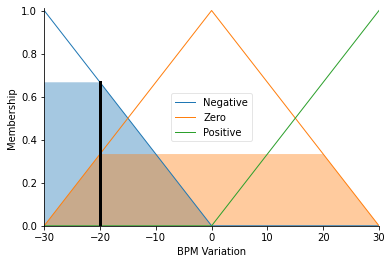

In [350]:
bpm = 75
bpm_variation = -20
calculate_intensity_fuzzy(bpm, bpm_variation, plot_consequent = True, plot_antecedent = True)

#### Dataset example

In [271]:
df_gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [351]:
def calculate_session_moment_intensity(generated_bpms, minute, print_values=False, plot_consequent=False, plot_antecedent=False):
    bpm_registered = generated_bpms[minute]
    if minute == 0:
        bpm_variation = 0
    else:
        last_bpm = genarated_heart_rates_session[minute - 1]
        bpm_variation = bpm_registered - last_bpm

    if print_values:
        print(f"Minute analized: {minute}")
        print(f"BPM registered: {bpm_registered}")
        print(f"Last BPM: {last_bpm}")
        print(f"BPM variation: {bpm_variation}")
    
    intensity = calculate_intensity_fuzzy(bpm_registered, bpm_variation, plot_consequent, plot_antecedent)
    if print_values:
        print(f"Intensity: {intensity}")
    return intensity

In [352]:
session_analized = df_gym.iloc[2]
session_analized['Workout_Type']

'Cardio'

Min: 54, Max: 167, Avg: 122, Std: 16.46049936331129, N: 66
Real average: 124.16
Real std: 13.21
Real min: 88.64
Real max: 154.70




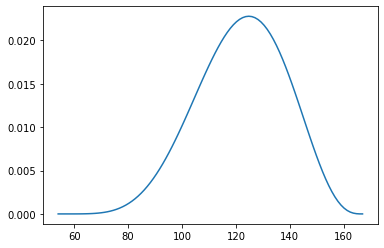

In [353]:
min, max, avg, N = session_analized['Resting_BPM'], session_analized['Max_BPM'], session_analized['Avg_BPM'], math.trunc(session_analized['Session_Duration (hours)'] * 60)
std = mean_std_ratio_avg_max * (max - avg)

try:
    genarated_heart_rates_session = genarate_heart_rates_beta(min, max, avg, std, N, True)

    print(f"Min: {min}, Max: {max}, Avg: {avg}, Std: {std}, N: {N}")
    
    print(f"Real average: {np.mean(genarated_heart_rates_session):.2f}")
    print(f"Real std: {np.std(genarated_heart_rates_session, ddof=1):.2f}")
    print(f"Real min: {np.min(genarated_heart_rates_session):.2f}")
    print(f"Real max: {np.max(genarated_heart_rates_session):.2f}")

    print('\n')
except Exception as e:
    print(f"Error for index {index}: {e}")

In [354]:
genarated_heart_rates_session

array([135.35387623,  94.11101009, 111.77235438, 119.50262215,
       139.86029972, 130.51838893, 124.76256861, 122.76046201,
       107.77751357, 131.18935656, 145.21408912, 125.92289777,
       130.22298428, 127.02690872, 129.14034413, 139.33239426,
       123.18214845, 110.83210967, 132.78104194, 121.50064833,
        92.51251571, 129.51109129, 105.82413243, 107.47796398,
       131.5728203 , 120.38108387, 134.43252383, 128.12752011,
       138.20596388, 117.6998004 , 133.25122576, 118.78638838,
       126.26458466, 103.29953697, 138.17534844, 144.69815138,
       113.54580279, 130.50710507, 133.65377413, 148.70128554,
       108.87525654, 133.11381708, 125.10265968,  88.64010652,
       125.47938335, 126.99807904, 115.23573273, 134.90888804,
       131.6433579 , 115.46138517, 128.88957999, 136.23922915,
       131.1208552 , 154.69513211, 133.07612969, 127.58932776,
       113.07618563, 132.01360661, 119.53286839, 114.60318585,
       109.47195277, 101.26304567, 129.77141876, 129.31

In [368]:
# Valor objetivo
target_value = 154.69513211

# Encontrar la posición del valor más cercano
closest_index = np.abs(genarated_heart_rates_session - target_value).argmin()
closest_value = genarated_heart_rates_session[closest_index]

print(f"Posición más cercana: {closest_index}")
print(f"Valor más cercano: {closest_value}")

Posición más cercana: 53
Valor más cercano: 154.69513210733675


Minute analized: 15
BPM registered: 139.33239426230057
Last BPM: 129.1403441299775
BPM variation: 10.192050132323061
Intensity: 42.06869058876929


c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


42.06869058876929

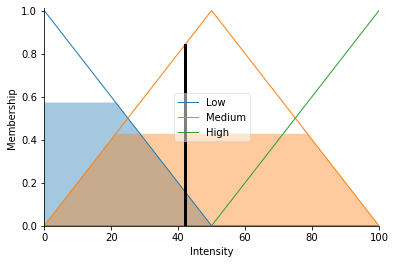

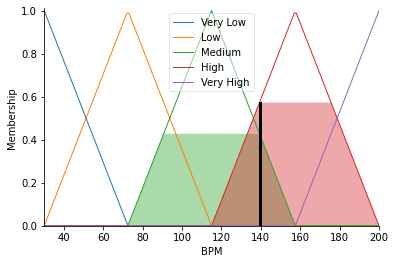

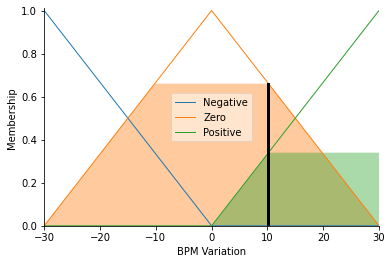

In [355]:
calculate_session_moment_intensity(genarated_heart_rates_session, minute = 15, print_values=True, plot_consequent = True, plot_antecedent = True)

Minute analized: 20
BPM registered: 92.51251571300695
Last BPM: 121.50064833264666
BPM variation: -28.988132619639714
Intensity: 76.43316959416845


c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


76.43316959416845

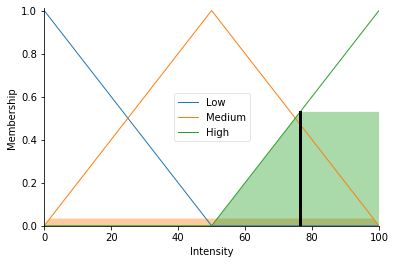

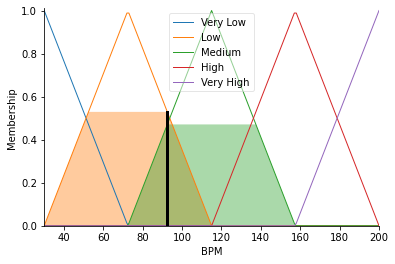

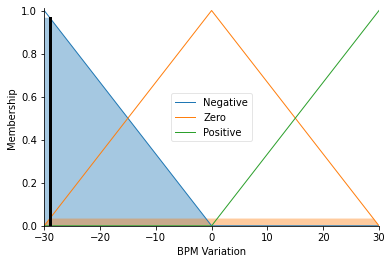

In [357]:
calculate_session_moment_intensity(genarated_heart_rates_session, minute = 20, print_values=True, plot_consequent = True, plot_antecedent = True)

Minute analized: 53
BPM registered: 154.69513210733675
Last BPM: 131.1208552038528
BPM variation: 23.574276903483934
Intensity: 24.110249806352368


c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


24.110249806352368

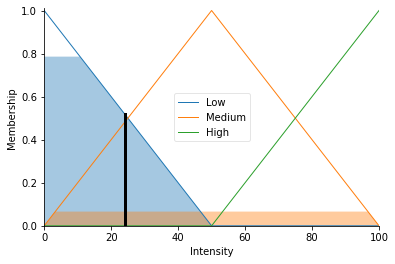

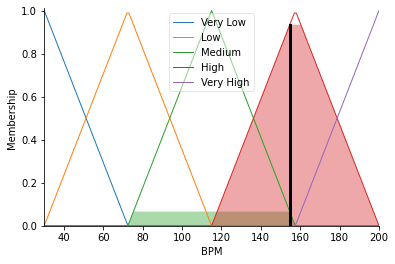

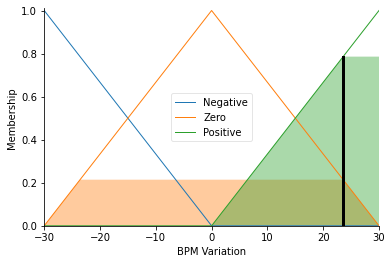

In [369]:
calculate_session_moment_intensity(genarated_heart_rates_session, minute = 53, print_values=True, plot_consequent = True, plot_antecedent = True)